# 04 Example

In [1]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + np.random.randn()
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [3]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [4]:
# 0D data repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.AverageSweep(runinfo, devices)
expt.run()

sleep(1)
expt.x1

Scan 1/1 Complete


4.715287568183171

In [5]:
# 1D repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.AverageSweep(runinfo, devices)
expt.start_thread()


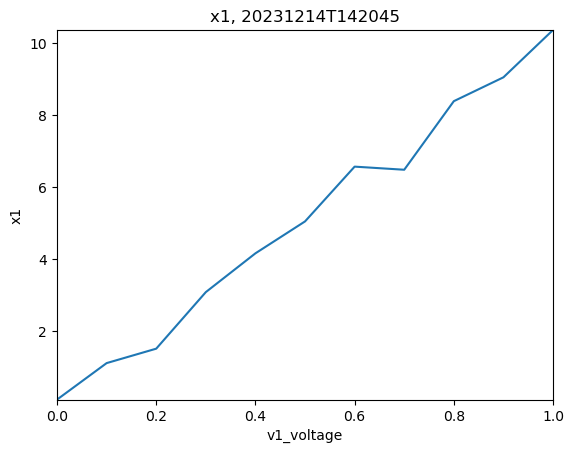

In [6]:
ps.live_plot1D(expt)

In [7]:
# 2D data repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)
runinfo.loop2 = ps.AverageScan(10, dt=0.1)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.AverageSweep(runinfo, devices)
expt.start_thread()


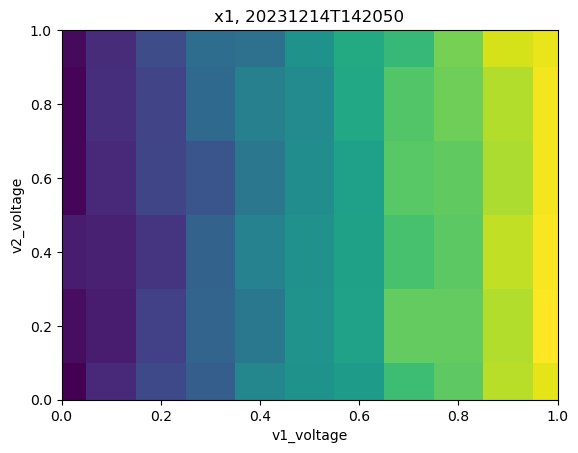

In [8]:
ps.live_plot2D(expt)